In [62]:
# In the age of digital music streaming, platforms like Spotify have revolutionized the way we listen to
# music. Analyzing streaming data can reveal valuable insights into listening habits, genre popularity,
# song features, and trends that define the music industry. In this project, we will explore Spotify’s
# track data to identify patterns, relationships between audio features and popularity, and the
# characteristics of top-charting songs.

# Dataset Link:
# https://www.kaggle.com/datasets/iamsumat/spotify-top-200-charts-2020

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('spotify_dataset.csv')

df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [66]:
# Cheking if null values, if any.
df.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

<h1>EDA</h1>

In [67]:
# Number of artists in the dataset

num_artist = df.Artist.unique()
print(f"Number of artists: {num_artist.size}")

Number of artists: 716


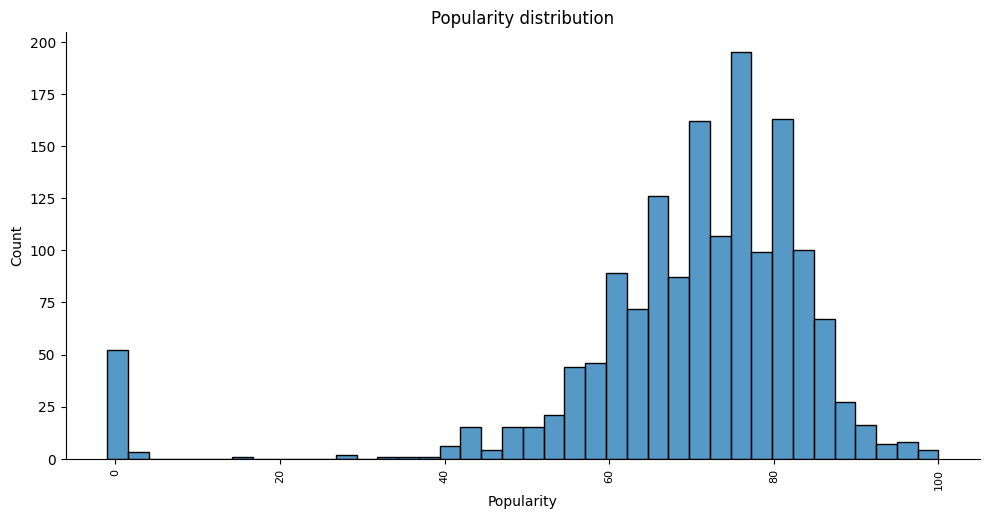

In [68]:
# distribution of song popularity scores

# converting from string to int(-1 means no value)
df['Popularity'] = df['Popularity'].replace(' ', -1)
df['Popularity'] = df['Popularity'].astype(int)
popularity_distribution = df.groupby('Popularity').size()
popularity_distribution

# plt.figure(figsize=(30,40))
sns.displot(data=df,x='Popularity', aspect=2)
plt.tick_params(axis='x', labelsize= 8)
plt.title("Popularity distribution")
plt.tick_params(axis='x', rotation = 90)

In [69]:
# Artists which appear most frequently in the Top 200

# top 10 artist and how many times they appear
top_artist = df[:200]['Artist'].sort_values(ascending=False)
top_artist.head(10)

112                                                dhruv
48     Wisin, Jhay Cortez, Anuel AA, Los Legendarios,...
182                                         Walker Hayes
97                                                WILLOW
156                                            Vegedream
126                                            Vance Joy
131                                         Trippie Redd
66                                      Trinidad Cardona
84                                    Travis Scott, HVME
144                                         Travis Scott
Name: Artist, dtype: object

In [70]:
# Most common genres

# Need to convert string representation of genre list as python list dt
import ast


def convert_to_list(item):
    if pd.isna(item):
        return []
    if isinstance(item, list):
        return item
    if isinstance(item, str):
        try:
            parsed = ast.literal_eval(item)
            if isinstance(parsed, list):
                return parsed
            else:
                return [parsed] 
        except:
            return [item]
    return []

df['Genre'] = df['Genre'].apply(convert_to_list)

print(df['Genre'])
genres = {}

for item in df['Genre']:
    
    if isinstance(item, list):
        for genre in item:
            print(genre)
            if genre in genres:
                genres[genre] += 1
            else:
                genres[genre] = 1



genres = pd.Series(genres)

0                [indie rock italiano, italian pop]
1                              [australian hip hop]
2                                             [pop]
3                                     [pop, uk pop]
4                         [lgbtq+ hip hop, pop rap]
                           ...                     
1551                       [dance pop, pop, uk pop]
1552           [sertanejo, sertanejo universitario]
1553    [dance pop, electropop, pop, post-teen pop]
1554                     [brega funk, funk carioca]
1555                           [pop, post-teen pop]
Name: Genre, Length: 1556, dtype: object
indie rock italiano
italian pop
australian hip hop
pop
pop
uk pop
lgbtq+ hip hop
pop rap
lgbtq+ hip hop
pop rap
dance pop
pop
puerto rican pop
trap latino
latin
reggaeton
trap latino
indie rock italiano
italian pop
dance pop
pop
uk pop
latin
reggaeton
reggaeton colombiano
k-pop
k-pop boy group
canadian pop
pop
post-teen pop
k-pop
k-pop boy group
pop
pop
canadian contemporary r&b
canad

In [72]:
genres.sort_values(ascending=False).head(10)


pop              485
rap              310
dance pop        257
post-teen pop    256
pop rap          164
trap             159
reggaeton        157
trap latino      155
latin            154
hip hop          151
dtype: int64